## AIR TRANSPORT
### Flight Delays

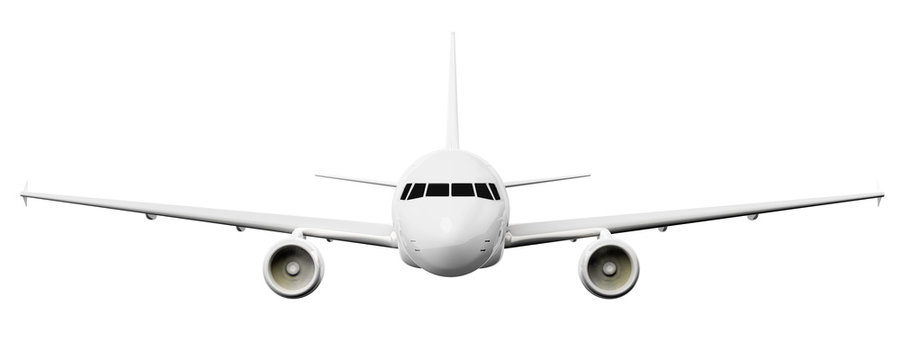

* Con este analisis se busca predecir retrasos aéreos superiores a 15 minutos. Esta predicción es crucial para la aerolínea, ya que nos permitira conocer donde se pueden minimizar costos operativos (evitando acumulación de retrasos).
Ademas se busca areas de mejora para la experiencia del cliente (menos molestias, mayor fidelidad).
Permitir planificación anticipada, mejorando la eficiencia operativa.
Con los modelos a desarrollar (Random Forest, Logistic Regression y KNN), se pueden tomar decisiones estratégicas para prevenir o mitigar los retrasos, optimizar horarios, asignar recursos eficientemente y ofrecer soluciones proactivas a los pasajeros.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
data= pd.read_csv('Airline_Delay_Cause.csv')

In [8]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,11,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",82.0,15.0,7.72,0.00,...,0.00,3.89,0.0,0.0,550.0,301.0,0.0,107.0,0.0,142.0
1,2024,11,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",8.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,11,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",82.0,10.0,5.05,1.00,...,0.00,2.49,0.0,2.0,559.0,298.0,55.0,48.0,0.0,158.0
3,2024,11,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",75.0,3.0,2.00,0.00,...,0.00,1.00,0.0,0.0,93.0,73.0,0.0,0.0,0.0,20.0
4,2024,11,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",91.0,10.0,2.53,0.00,...,0.00,3.61,0.0,0.0,406.0,196.0,0.0,110.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678,2024,1,WN,Southwest Airlines,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",685.0,191.0,74.25,1.66,...,1.13,85.13,27.0,4.0,9326.0,3248.0,317.0,1012.0,37.0,4712.0
20679,2024,1,WN,Southwest Airlines,RIC,"Richmond, VA: Richmond International",140.0,35.0,14.17,0.00,...,0.00,17.81,0.0,0.0,1384.0,578.0,0.0,107.0,0.0,699.0
20680,2024,1,WN,Southwest Airlines,RNO,"Reno, NV: Reno/Tahoe International",705.0,134.0,39.02,0.52,...,0.08,80.49,12.0,7.0,6313.0,1464.0,75.0,1012.0,2.0,3760.0
20681,2024,1,WN,Southwest Airlines,ROC,"Rochester, NY: Frederick Douglass Grtr Rochest...",170.0,51.0,23.59,1.11,...,1.00,19.85,4.0,1.0,2520.0,1121.0,130.0,233.0,37.0,999.0


In [10]:
data.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
20678,2024,1,WN,Southwest Airlines,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",685.0,191.0,74.25,1.66,...,1.13,85.13,27.0,4.0,9326.0,3248.0,317.0,1012.0,37.0,4712.0
20679,2024,1,WN,Southwest Airlines,RIC,"Richmond, VA: Richmond International",140.0,35.0,14.17,0.00,...,0.00,17.81,0.0,0.0,1384.0,578.0,0.0,107.0,0.0,699.0
20680,2024,1,WN,Southwest Airlines,RNO,"Reno, NV: Reno/Tahoe International",705.0,134.0,39.02,0.52,...,0.08,80.49,12.0,7.0,6313.0,1464.0,75.0,1012.0,2.0,3760.0
20681,2024,1,WN,Southwest Airlines,ROC,"Rochester, NY: Frederick Douglass Grtr Rochest...",170.0,51.0,23.59,1.11,...,1.00,19.85,4.0,1.0,2520.0,1121.0,130.0,233.0,37.0,999.0
20682,2024,1,WN,Southwest Airlines,RSW,"Fort Myers, FL: Southwest Florida International",700.0,227.0,58.92,1.76,...,0.00,85.15,17.0,1.0,12562.0,3962.0,149.0,3151.0,0.0,5300.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20683 entries, 0 to 20682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20683 non-null  int64  
 1   month                20683 non-null  int64  
 2   carrier              20683 non-null  object 
 3   carrier_name         20683 non-null  object 
 4   airport              20683 non-null  object 
 5   airport_name         20683 non-null  object 
 6   arr_flights          20668 non-null  float64
 7   arr_del15            20663 non-null  float64
 8   carrier_ct           20668 non-null  float64
 9   weather_ct           20668 non-null  float64
 10  nas_ct               20668 non-null  float64
 11  security_ct          20668 non-null  float64
 12  late_aircraft_ct     20668 non-null  float64
 13  arr_cancelled        20668 non-null  float64
 14  arr_diverted         20668 non-null  float64
 15  arr_delay            20668 non-null 

data.describe()


In [16]:
print(data.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


## DATA CLEANING

* Cuando los missing values son pocos, se pueden eliminar sin afectar el analisis.
* Usamos Dropna para eliminar los valores nulos.
* Convertimos las variables categoricas en numericas con LabelEncoder. 
* Verificamos duplicados y que ya no hayan missing values.

In [20]:
data.isnull().sum()

year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            15
arr_del15              20
carrier_ct             15
weather_ct             15
nas_ct                 15
security_ct            15
late_aircraft_ct       15
arr_cancelled          15
arr_diverted           15
arr_delay              15
carrier_delay          15
weather_delay          15
nas_delay              15
security_delay         15
late_aircraft_delay    15
dtype: int64

In [22]:
data_cleaned = data.dropna()

In [24]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

cat_cols = data_cleaned.select_dtypes(include=['object']).columns

for col in cat_cols:
       data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])


In [26]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20663 entries, 0 to 20682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20663 non-null  int64  
 1   month                20663 non-null  int64  
 2   carrier              20663 non-null  object 
 3   carrier_name         20663 non-null  object 
 4   airport              20663 non-null  object 
 5   airport_name         20663 non-null  object 
 6   arr_flights          20663 non-null  float64
 7   arr_del15            20663 non-null  float64
 8   carrier_ct           20663 non-null  float64
 9   weather_ct           20663 non-null  float64
 10  nas_ct               20663 non-null  float64
 11  security_ct          20663 non-null  float64
 12  late_aircraft_ct     20663 non-null  float64
 13  arr_cancelled        20663 non-null  float64
 14  arr_diverted         20663 non-null  float64
 15  arr_delay            20663 non-null  floa

In [28]:
data.duplicated().sum()

0

In [30]:
data_cleaned.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

### Total delay distribution in minutes

Este grafico muestra la distribucion de los retrasos totales en minutos. 
Podemos obseevar en le grafico que la mayoria de los valores se concentran cerca de el valor 0 minutos, por lo que la mayioria
de los vuelos tienen retrasos bajos. 
Sin embargo, se logra observar un pequeno valor de vuelos con retrasos extremadamente largos de hasta 600,000 minutos, 
es decir mas de 400 dias, por lo que podria ser un error. 
dias= minutos / 60 x 24 
600,000/ 60x24 = 600,000/1,440 = 416.67 dias. 

Queremos realizar un mejor analisis, por lo que decidimos eliminar los valores atipicos.

In [36]:
dias = 600000 / (60*24)
print(dias)

416.6666666666667


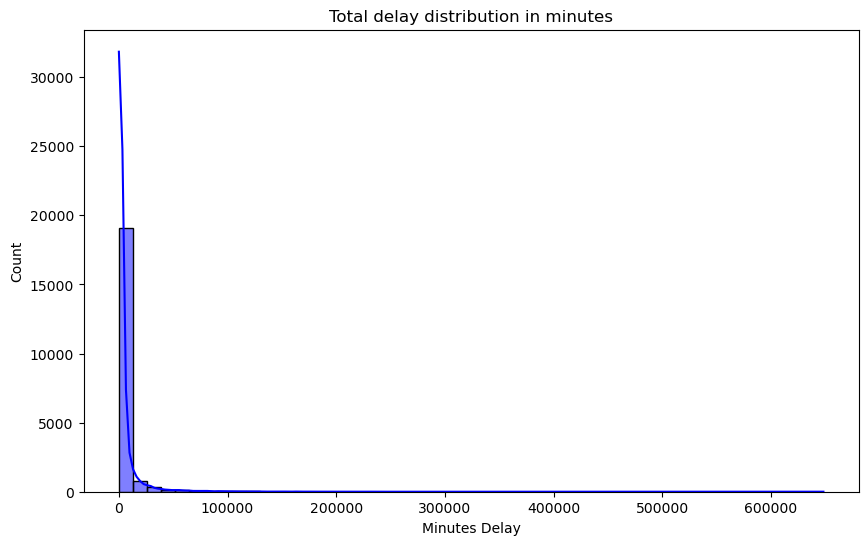

In [34]:
data["total_delay"] = data[["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(data["total_delay"], bins=50, kde=True, color='blue')
plt.title("Total delay distribution in minutes")
plt.xlabel("Minutes Delay")
plt.show()

### Total distribution of delays in minutes (no outliers)

Filtramos los retrasos mayores a 5000 minutos.

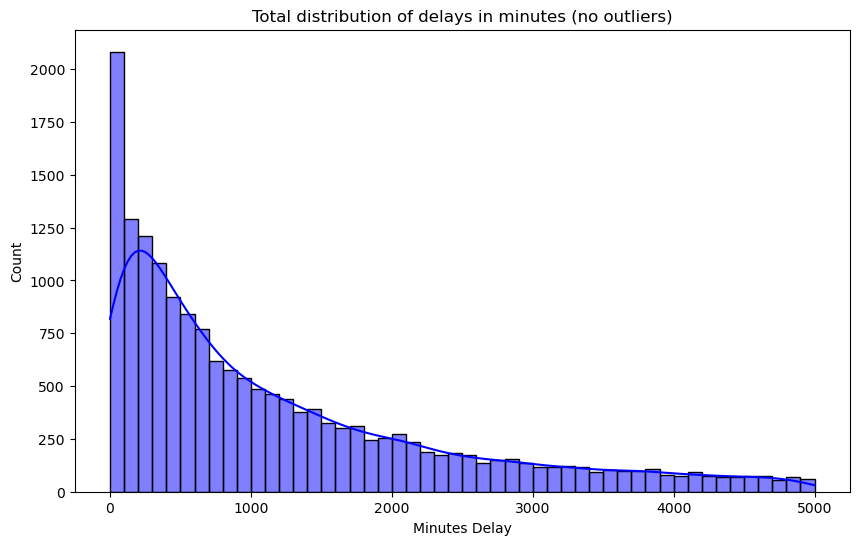

In [40]:
data_filtered = data[data["total_delay"] < 5000]  

plt.figure(figsize=(10, 6))
sns.histplot(data_filtered["total_delay"], bins=50, kde=True, color='blue')
plt.title("Total distribution of delays in minutes (no outliers)")
plt.xlabel("Minutes Delay")
plt.show()
